r = 0.04900500000000001


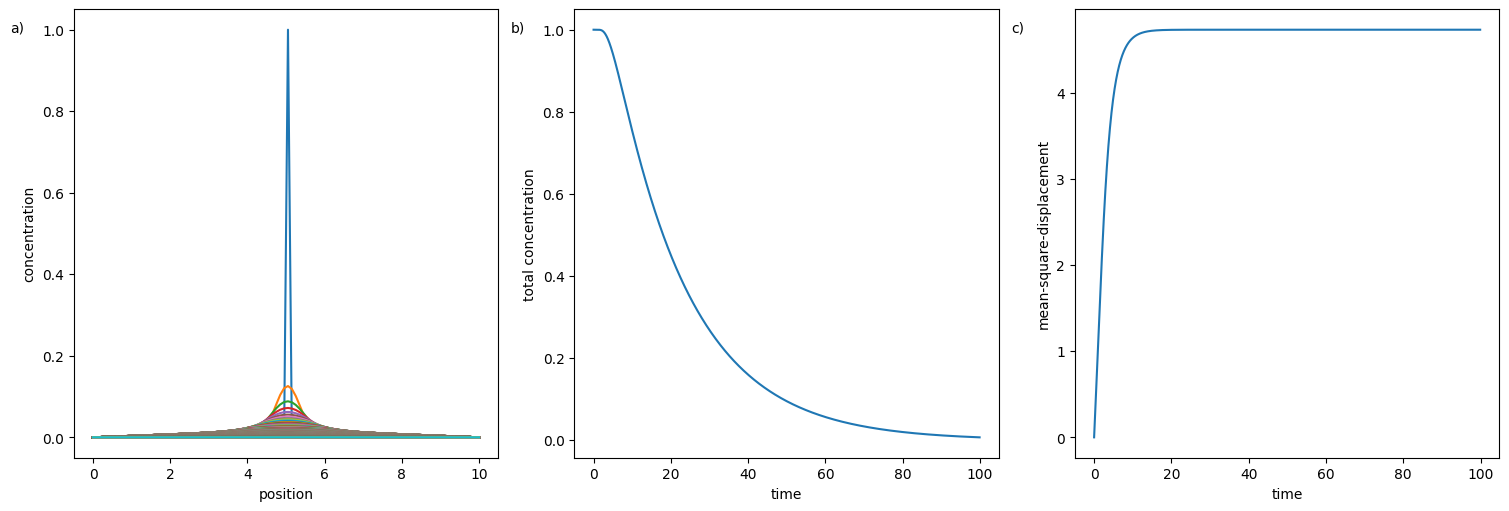

In [ ]:
#
# Import needed libraries
#
import matplotlib.pyplot as plt
import numpy as np
#
# Define a function to calculate the mean-square-displacement from the current concentration profile
#
def msd(array):
    md=0.0
    for i in range(len(array)):
        md+=array[i]*float(i)
    md/=np.sum(array)
    msd=0.0
    for i in range(len(array)):
        msd+=array[i]*(float(i)**2-md**2)
    msd/=np.sum(array)
    return msd
#
# Define system
#
numberOfParticles=1
systemLength=10.0
diffusionConstant=0.5
NSpatial=100 # must be even -> odd number of spatial points
deltaX=systemLength/float(NSpatial-1)
deltaTime=1e-3
#
# Determine r and check if r<0.5
#
r=diffusionConstant*deltaTime/deltaX**2
if r>0.5:
    print('r>0.5, stopping')
    exit()
else:
    print('r = '+str(r))
#
# Set simulation variables
#
iterationNum=100000
iterationOuputFreq=100
#
# Define initial (localized) concentration column vector (as a list)
#
C=np.zeros(NSpatial)
C[int(NSpatial/2)]=float(numberOfParticles) # localized concentration in the middle of the system
#
# Define subplot arrangement
#
fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(1,3)
panel00 = fig.add_subplot(gs[0,0])
panel01 = fig.add_subplot(gs[0,1])
panel02 = fig.add_subplot(gs[0,2])

#
# Plot spatial evolution 
#
panel00.set_xlabel(r'position')
panel00.set_ylabel(r'concentration')
#panel00.set_yscale('log') #exact we have e expnential weth exp(-t^2), so if we take the log we get a parabola
panel00.text(-0.15,0.95,'a)',transform=panel00.transAxes)
#
# Plot temporal evolution
#
panel01.set_xlabel(r'time')
panel01.set_ylabel(r'total concentration')
#panel01.set_ylim([0.0,1.05])
panel01.text(-0.15,0.95,'b)',transform=panel01.transAxes)
#
# Plot mean-square-displacement (variance) associated with concentration profile
#
panel02.set_xlabel(r'time')
panel02.set_ylabel(r'mean-square-displacement')
panel02.text(-0.15,0.95,'c)',transform=panel02.transAxes)
#
# Initialize time and total concentration lists
#
timeList=[0.0]
totalCList=[np.sum(C)]
msdList=[0.0]
#
# Generate plot of sta\maketitlerting solution
#
panel00.plot([float(i)*deltaX for i in range(len(C))],C)
#
# Iterate the FDM-Diffusion recurrence relation 'iterationNum' times 
#
for iteration in range(1,iterationNum):
#
# Make a copy of the current concentration
#
    C1=C
#
# Fixed boundary conditions (C[0] and C[NSpatial-1] do not change)
#
    for n in range(1,NSpatial-1): # range Nspatial is from 1 to N-1 , but we want 1 to N-2
        C[n]=r*C1[n-1]+(1.0-2.0*r)*C1[n]+r*C1[n+1] #C is now one row higher than C1
#
# Every 'iterationOutputFreq' iteration generate a plot of the solution
#
    if (iteration%iterationOuputFreq==0): #ouput every 100 times
        panel00.plot([float(i)*deltaX for i in range(len(C))],C)
        timeList.append(timeList[-1]+float(iterationOuputFreq)*deltaTime)
        msdList.append(msd(C)*deltaX**2)
        totalCList.append(np.sum(C))
#
# Ouput all plots to the screen
#
panel01.plot(timeList,totalCList)
panel02.plot(timeList,msdList)

fig.set_figheight(5)
fig.set_figwidth(15)
plt.show()


#we lose the coencentration at the boundaies since we set it to zero and if someting defuses into it we lose that particle
#rgo we lose on total concentration

#with huge values we basically loose all the concentration and so nothing can be more distance from the center
#sp the mean square displacement is saturated

r = 0.0049005


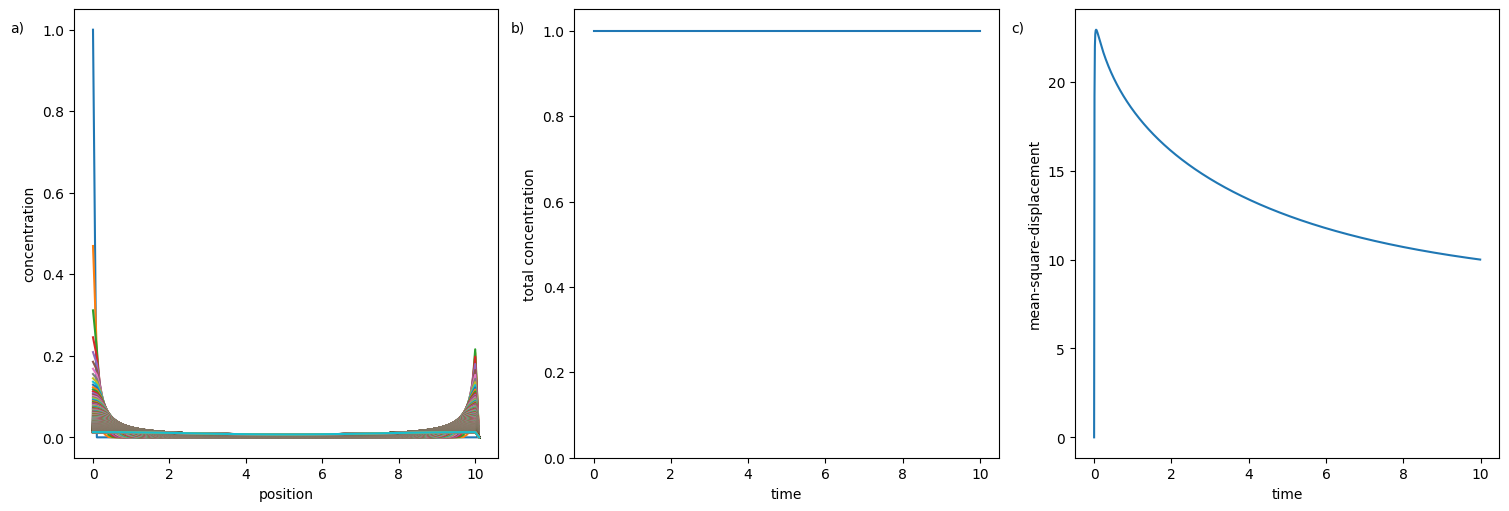

In [45]:
#Now with bounday conditions
#
# Import needed libraries
#
import matplotlib.pyplot as plt
import numpy as np
#
# Define a function to calculate the mean-square-displacement from the current concentration profile
#
def msd(array):
    md=0.0
    for i in range(len(array)):
        md+=array[i]*float(i)
    md/=np.sum(array)
    msd=0.0
    for i in range(len(array)):
        msd+=array[i]*(float(i)**2-md**2)
    msd/=np.sum(array)
    return msd
#
# Define system
#
numberOfParticles=1
systemLength=10.0
diffusionConstant=0.5
NSpatial=100 # must be even -> odd number of spatial points
deltaX=systemLength/float(NSpatial-1)
deltaTime=1e-4
#
# Determine r and check if r<0.5
#
r=diffusionConstant*deltaTime/deltaX**2
if r>0.5:
    print('r>0.5, stopping')
    exit()
else:
    print('r = '+str(r))
#
# Set simulation variables
#
iterationNum=100000
iterationOuputFreq=100
#
# Define initial (localized) concentration column vector (as a list)
#
C=np.zeros(NSpatial+1)
#C[int(NSpatial/2)]=float(numberOfParticles) # localized concentration in the middle of the system
C[0]=float(numberOfParticles)
#
# Define subplot arrangement
#
fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(1,3)
panel00 = fig.add_subplot(gs[0,0])
panel01 = fig.add_subplot(gs[0,1])
panel02 = fig.add_subplot(gs[0,2])

#
# Plot spatial evolution 
#
panel00.set_xlabel(r'position')
panel00.set_ylabel(r'concentration')
#panel00.set_yscale('log') #exact we have e expnential weth exp(-t^2), so if we take the log we get a parabola
panel00.text(-0.15,0.95,'a)',transform=panel00.transAxes)
#
# Plot temporal evolution
#
panel01.set_xlabel(r'time')
panel01.set_ylabel(r'total concentration')
panel01.set_ylim([0.0,1.05])
panel01.text(-0.15,0.95,'b)',transform=panel01.transAxes)
#
# Plot mean-square-displacement (variance) associated with concentration profile
#
panel02.set_xlabel(r'time')
panel02.set_ylabel(r'mean-square-displacement')
panel02.text(-0.15,0.95,'c)',transform=panel02.transAxes)
#
# Initialize time and total concentration lists
#
timeList=[0.0]
totalCList=[np.sum(C)]
msdList=[0.0]
#
# Generate plot of sta\maketitlerting solution
#
panel00.plot([float(i)*deltaX for i in range(len(C))],C)
#
# Iterate the FDM-Diffusion recurrence relation 'iterationNum' times 
#
for iteration in range(1,iterationNum):
#
# Make a copy of the current concentration
#
    #C1=C
    C1=np.copy(C)
#
# Fixed boundary conditions (C[0] and C[NSpatial-1] do not change)
#
    for n in range(0,NSpatial): 
        C[n%NSpatial]=r*C1[(n-1)%NSpatial]+(1.0-2.0*r)*C1[n%NSpatial]+r*C1[(n+1)%NSpatial] #C is now one row higher than C1
#
# Every 'iterationOutputFreq' iteration generate a plot of the solution
#
    if (iteration%iterationOuputFreq==0): #ouput every 100 times
        panel00.plot([float(i)*deltaX for i in range(len(C))],C)
        timeList.append(timeList[-1]+float(iterationOuputFreq)*deltaTime)
        msdList.append(msd(C)*deltaX**2)
        totalCList.append(np.sum(C))
#
# Ouput all plots to the screen
#
panel01.plot(timeList,totalCList)
panel02.plot(timeList,msdList)

fig.set_figheight(5)
fig.set_figwidth(15)
plt.show()


#we lose the coencentration at the boundaies since we set it to zero and if someting defuses into it we lose that particle
#rgo we lose on total concentration

#with huge values we basically loose all the concentration and so nothing can be more distance from the center
#sp the mean square displacement is saturated

r = 0.04900500000000001


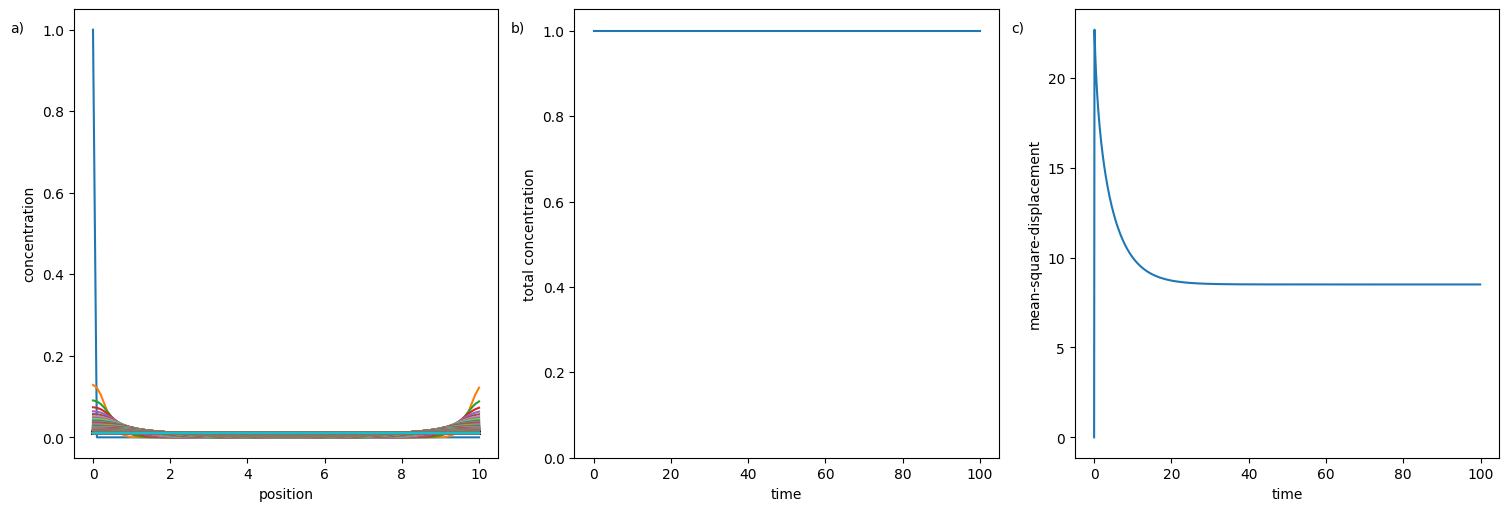

In [44]:
#
# Import needed libraries
#
import matplotlib.pyplot as plt
import numpy as np
#
# Define a function to calculate the mean-square-displacement from the current concentration profile
#
def msd(array):
    md=0.0
    for i in range(len(array)):
        md+=array[i]*float(i)
    md/=np.sum(array)
    msd=0.0
    for i in range(len(array)):
        msd+=array[i]*(float(i)**2-md**2)
    msd/=np.sum(array)
    return msd
#
# Define system
#
numberOfParticles=1
systemLength=10.0
diffusionConstant=0.5
NSpatial=100 # must be even -> odd number of spatial points
deltaX=systemLength/float(NSpatial-1)
deltaTime=1e-3
#
# Determine r and check if r<0.5
#
r=diffusionConstant*deltaTime/deltaX**2
if r>0.5:
    print('r>0.5, stopping')
    exit()
else:
    print('r = '+str(r))
#
# Set simulation variables
#
iterationNum=100000
iterationOuputFreq=100
#
# Define initial (localized) concentration column vector (as a list)
#
C=np.zeros(NSpatial)
#C[int(NSpatial/2)]=float(numberOfParticles) # localized concentration in the middle of the system
C[0]=float(numberOfParticles)
#
# Define subplot arrangement
#
fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(1,3)
panel00 = fig.add_subplot(gs[0,0])
panel01 = fig.add_subplot(gs[0,1])
panel02 = fig.add_subplot(gs[0,2])

#
# Plot spatial evolution 
#
panel00.set_xlabel(r'position')
panel00.set_ylabel(r'concentration')
#panel00.set_yscale('log') #exact we have e expnential weth exp(-t^2), so if we take the log we get a parabola
panel00.text(-0.15,0.95,'a)',transform=panel00.transAxes)
#
# Plot temporal evolution
#
panel01.set_xlabel(r'time')
panel01.set_ylabel(r'total concentration')
panel01.set_ylim([0.0,1.05])
panel01.text(-0.15,0.95,'b)',transform=panel01.transAxes)
#
# Plot mean-square-displacement (variance) associated with concentration profile
#
panel02.set_xlabel(r'time')
panel02.set_ylabel(r'mean-square-displacement')
panel02.text(-0.15,0.95,'c)',transform=panel02.transAxes)
#
# Initialize time and total concentration lists
#
timeList=[0.0]
totalCList=[np.sum(C)]
msdList=[0.0]
#
# Generate plot of sta\maketitlerting solution
#
panel00.plot([float(i)*deltaX for i in range(len(C))],C)
#
# Iterate the FDM-Diffusion recurrence relation 'iterationNum' times 
#
for iteration in range(1,iterationNum):
#
# Make a copy of the current concentration
#
    #C1=C
    C1 = np.copy(C)
#
# Fixed boundary conditions (C[0] and C[NSpatial-1] do not change)
#
    C[0]=r*C1[-1]+(1.0-2.0*r)*C1[0]+r*C1[1]
    for n in range(1,NSpatial-1): # range Nspatial is from 1 to N-1 , but we want 1 to N-2
        C[n]=r*C1[n-1]+(1.0-2.0*r)*C1[n]+r*C1[n+1] #C is now one row higher than C1
    C[NSpatial-1]=r*C1[NSpatial-2]+(1.0-2.0*r)*C1[NSpatial-1]+r*C1[0]
#
# Every 'iterationOutputFreq' iteration generate a plot of the solution
#
    if (iteration%iterationOuputFreq==0): #ouput every 100 times
        panel00.plot([float(i)*deltaX for i in range(len(C))],C)
        timeList.append(timeList[-1]+float(iterationOuputFreq)*deltaTime)
        msdList.append(msd(C)*deltaX**2)
        totalCList.append(np.sum(C))
#
# Ouput all plots to the screen
#
panel01.plot(timeList,totalCList)
panel02.plot(timeList,msdList)

fig.set_figheight(5)
fig.set_figwidth(15)
plt.show()


#we lose the coencentration at the boundaies since we set it to zero and if someting defuses into it we lose that particle
#rgo we lose on total concentration

#with huge values we basically loose all the concentration and so nothing can be more distance from the center
#sp the mean square displacement is saturated

5